In [2]:
#그래프 환경설정
options(warn = -1)
options(repr.plot.width = 15, repr.plot.height=9)
Sys.setlocale(category = 'LC_ALL' , locale = 'ko_KR.UTF-8') ## 한글보이기

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

### 회귀분석


In [4]:
# 단순 회귀 분석
regression <- read.csv("../Data/regression.csv")
head(regression)
tail(regression)

,age,Height,Weight
,<chr>,<dbl>,<dbl>
1,0~3Months,59.1,5.9
2,3~6Months,66.7,8.0
3,6~9Months,71.4,8.9
4,9~12Months,75.0,10.1
5,12~18Months,80.1,10.9
6,2Year,87.8,13.2


,age,Height,Weight
,<chr>,<dbl>,<dbl>
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


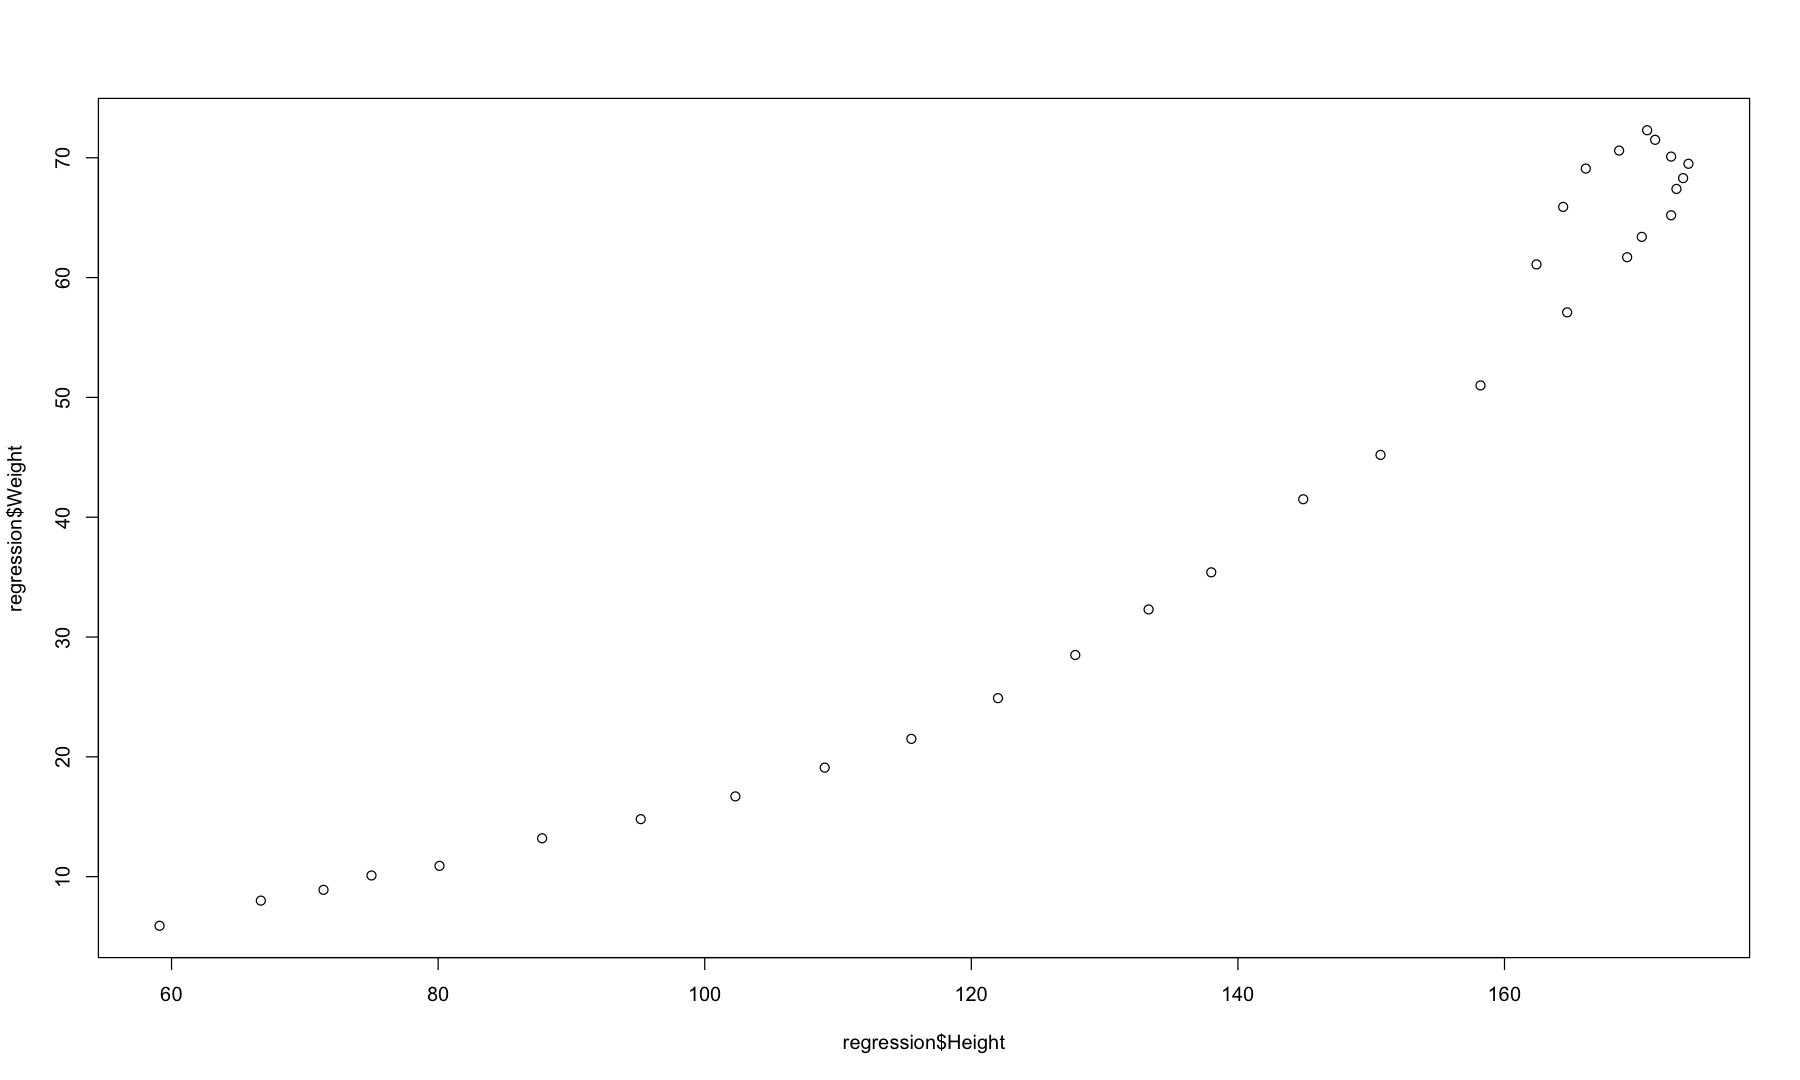

In [6]:
par(bg="white")
plot(regression$Height, regression$Weight)

In [8]:
#상관계수
cor(regression$Height, regression$Weight)

[1] 0.9672103

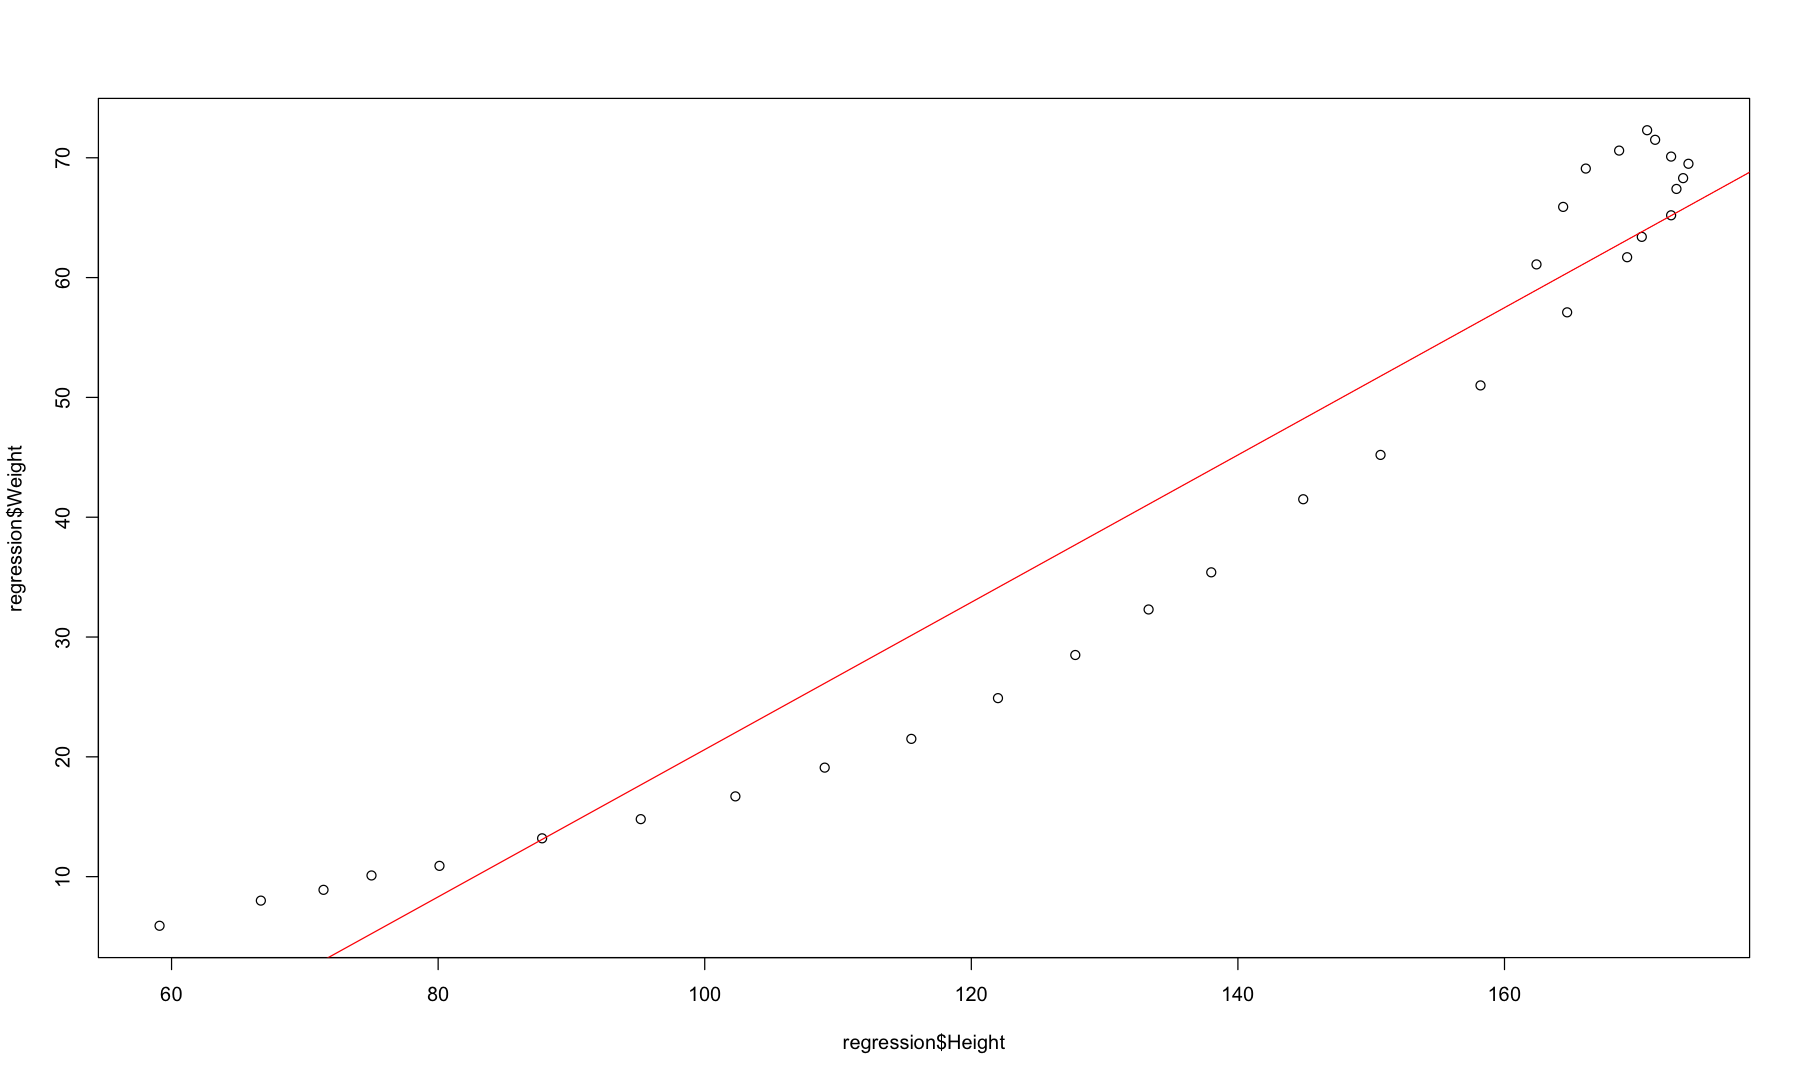

In [13]:
par(bg="white")
plot(regression$Weight~regression$Height)

#회귀식 
r <- lm(regression$Weight~regression$Height) #lm(종속변수 ~ 독립변수)
abline(r, col="red")

In [16]:
#분석 결과
summary(r)


Call:
lm(formula = regression$Weight ~ regression$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2327 -5.9811  0.0915  5.3125 10.4346 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -40.86594    4.22768  -9.666 1.42e-10 ***
regression$Height   0.61474    0.02998  20.508  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.355 on 29 degrees of freedom
Multiple R-squared:  0.9355,	Adjusted R-squared:  0.9333 
F-statistic: 420.6 on 1 and 29 DF,  p-value: < 2.2e-16


p-value: < 2.2e-16  < 0.05  
Adjusted R-squared:  0.9333  <- 예측력  (93%예측)


Weight = 0.61474 * height + -40.86594

In [18]:
# 키가 170인 사람의 몸무게
0.6147 * 170- 40.8659

#표준오차를 적용한 키가 170인 사람의 몸무게
cat(0.6147 *170 - 40.8659 - 6.355, "~", 0.6147*170 - 40.8659 + 6.355)

[1] 63.6331

57.2781 ~ 69.9881

In [19]:
iq <- read.csv("../Data/IQ.csv")
head(iq)

,이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
,<chr>,<int>,<int>,<int>,<int>,<int>
1,A,90,140,2,1,0
2,B,75,125,1,3,3
3,C,77,120,1,0,4
4,D,83,135,2,3,2
5,E,65,105,0,4,4
6,F,80,123,3,1,1


In [24]:
# 1) 성적과 가장 관련이 깊은 항목은
cor(iq$IQ,iq$`성적`)
cor(iq$`다니는.학원수`,iq$`성적`)
cor(iq$`게임하는.시간`,iq$`성적`)
cor(iq$`TV시청.시간`,iq$`성적`)

cor(iq[-1])


[1] 0.9102242

[1] 0.7840514

[1] -0.3383549

[1] -0.8473333

,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
성적,1.0000000,0.9102242,0.7840514,-0.3383549,-0.8473333
IQ,0.9102242,1.0000000,0.6009466,-0.1038108,-0.6783251
다니는.학원수,0.7840514,0.6009466,1.0000000,-0.3106005,-0.8465387
게임하는.시간,-0.3383549,-0.1038108,-0.3106005,1.0000000,0.2440191
TV시청.시간,-0.8473333,-0.6783251,-0.8465387,0.2440191,1.0000000


In [31]:
#2) IQ가 126인 사람의 성적을 예측해 보세요.

In [28]:
#2) IQ가 126인 사람의 성적을 예측해 보세요.
q <- lm(iq$IQ ~ iq$`성적`) #lm(종속변수 ~ 독립변수)
summary(q)


Call:
lm(formula = iq$IQ ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3956 -3.1991  0.7426  3.6946  5.4766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.0353    15.7260   1.783 0.112480    
iq$성적       1.2340     0.1985   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.504 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [32]:
cat(1.2340*126  -28.0353 -4.504 , "~",1.2340*126 - 28.0353 +4.504)

122.9447 ~ 131.9527

In [38]:
#3) 학원을 몇군데 다녀야 성적이 90점이 될까?
q <- lm(iq$`다니는.학원수` ~ iq$`성적`) #lm(종속변수 ~ 독립변수)
summary(q)


Call:
lm(formula = iq$다니는.학원수 ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2775 -0.4142 -0.0437  0.4945  1.0948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -7.89163    2.75190  -2.868  0.02090 * 
iq$성적      0.12410    0.03473   3.573  0.00726 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7882 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264


In [43]:
cat(0.12410*90 -7.89163 -0.7882, "~",0.12410*90 -7.89163 +0.7882 )

#iq$성적      0.12410
#Residual standard error: 0.7882
#(Intercept) -7.89163  오차

2.48917 ~ 4.06557

In [44]:
# 4)성적이 85점이상이 되려면 IQ는 얼마이상?
p <- lm(iq$IQ ~ iq$`성적`)
summary(p)


Call:
lm(formula = iq$IQ ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3956 -3.1991  0.7426  3.6946  5.4766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.0353    15.7260   1.783 0.112480    
iq$성적       1.2340     0.1985   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.504 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [50]:
cat(1.2340*85 - 4.504 -28.0353, "~", 1.2340*85 - 4.504 +28.0353)

72.3507 ~ 128.4213

### 다중회귀
: 여러개의 항목들로 구성된 식으로 예측하는 방법

In [54]:
data(attitude)
#대형

In [53]:
head(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43,51,30,39,61,92,45
2,63,64,51,54,63,73,47
3,71,70,68,69,76,86,48
4,61,63,45,47,54,84,35
5,81,78,56,66,71,83,47
6,43,55,49,44,54,49,34


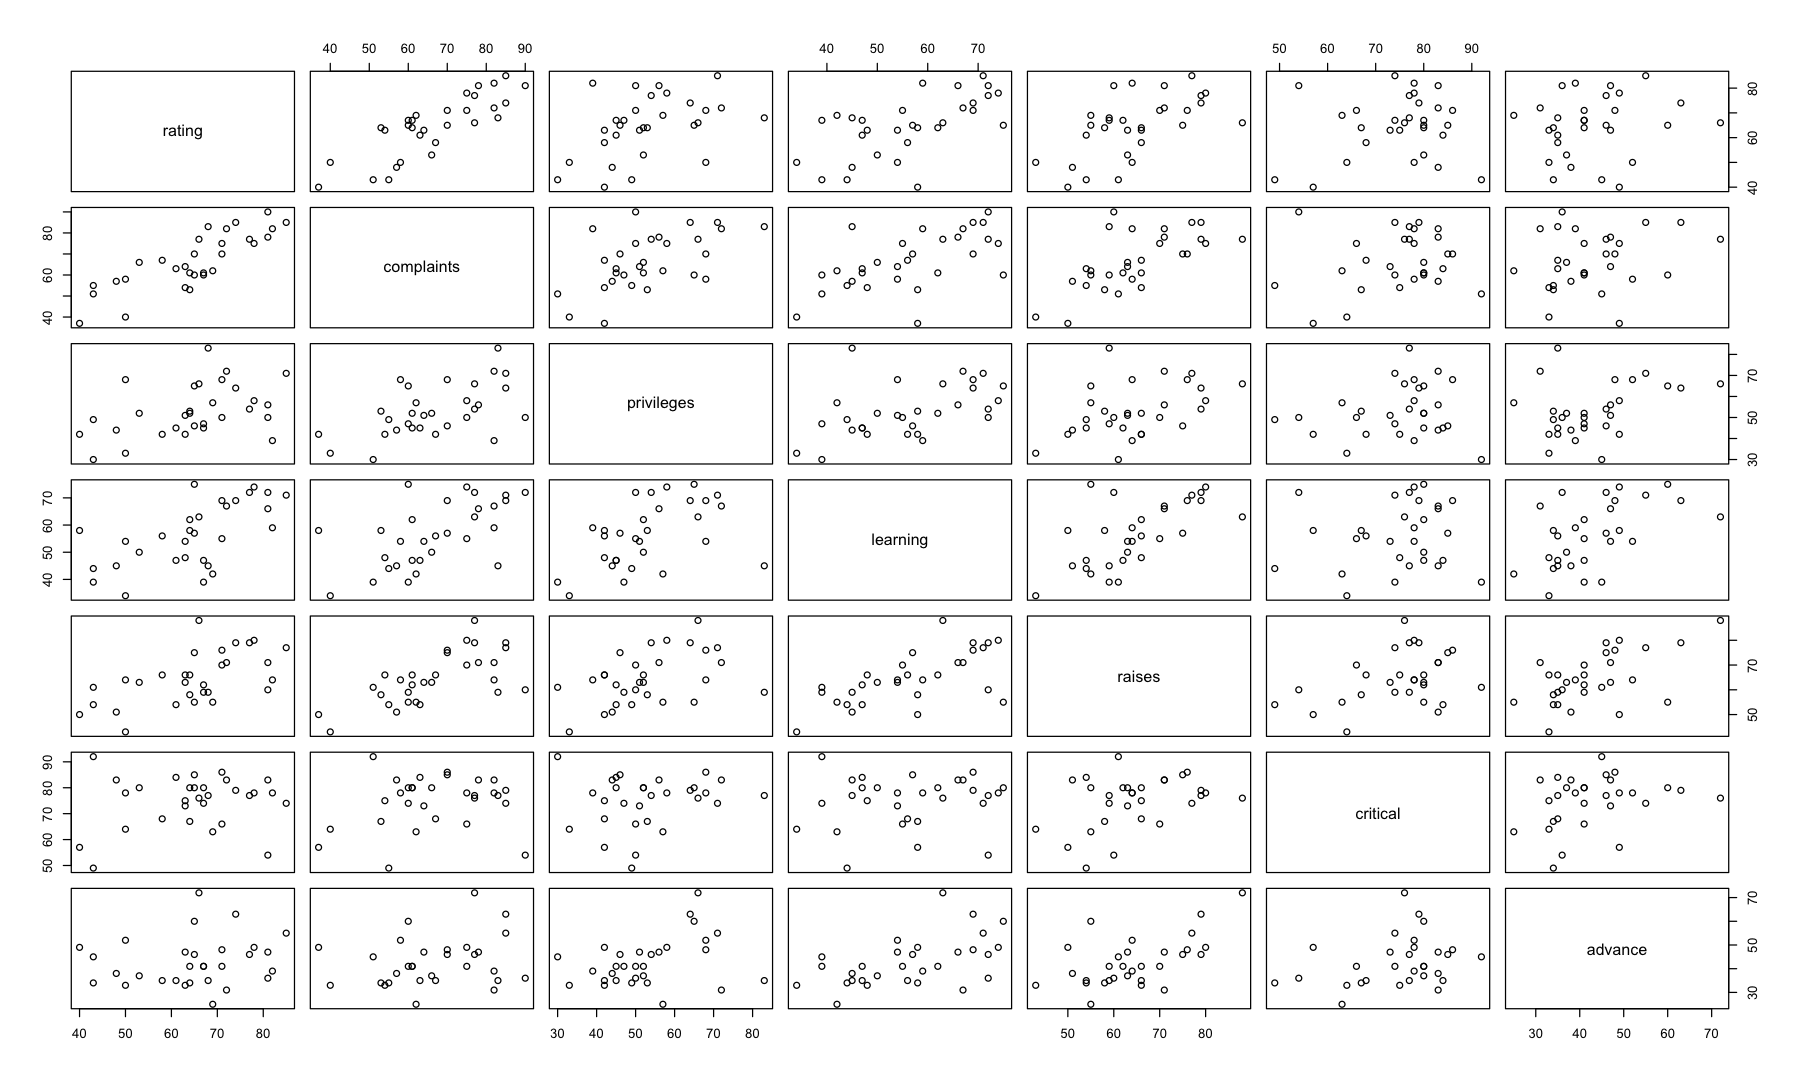

In [56]:
par(bg="white")
plot(attitude)

In [58]:
model <- lm(rating~ ., data = attitude)
model


Call:
lm(formula = rating ~ ., data = attitude)

Coefficients:
(Intercept)   complaints   privileges     learning       raises     critical  
   10.78708      0.61319     -0.07305      0.32033      0.08173      0.03838  
    advance  
   -0.21706  


In [59]:
summary(model)


Call:
lm(formula = rating ~ ., data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 1.24e-05


In [60]:
cor(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
rating,1.0000000,0.8254176,0.4261169,0.6236782,0.5901390,0.1564392,0.1550863
complaints,0.8254176,1.0000000,0.5582882,0.5967358,0.6691975,0.1877143,0.2245796
privileges,0.4261169,0.5582882,1.0000000,0.4933310,0.4454779,0.1472331,0.3432934
learning,0.6236782,0.5967358,0.4933310,1.0000000,0.6403144,0.1159652,0.5316198
raises,0.5901390,0.6691975,0.4454779,0.6403144,1.0000000,0.3768830,0.5741862
critical,0.1564392,0.1877143,0.1472331,0.1159652,0.3768830,1.0000000,0.2833432
advance,0.1550863,0.2245796,0.3432934,0.5316198,0.5741862,0.2833432,1.0000000


In [61]:
# 예측력을 높히기 위해 상대적으로 기여도가 낮은 변수를 제거
reduced <- step(model, direction = "backward")

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  

In [63]:
summary(reduced)


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5568  -5.7331   0.6701   6.5341  10.3610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.8709     7.0612   1.398    0.174    
complaints    0.6435     0.1185   5.432 9.57e-06 ***
learning      0.2112     0.1344   1.571    0.128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.817 on 27 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.6864 
F-statistic: 32.74 on 2 and 27 DF,  p-value: 6.058e-08


In [65]:
model <- lm(rating ~ complaints, data=attitude)
summary(model)


Call:
lm(formula = rating ~ complaints, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8799  -5.9905   0.1783   6.2978   9.6294 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.37632    6.61999   2.172   0.0385 *  
complaints   0.75461    0.09753   7.737 1.99e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.993 on 28 degrees of freedom
Multiple R-squared:  0.6813,	Adjusted R-squared:  0.6699 
F-statistic: 59.86 on 1 and 28 DF,  p-value: 1.988e-08


### iris에 대한 다중 회귀분석

In [79]:
summary(iris)
cor(iris[-5])

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


In [90]:
model <- lm(as.numeric(Species) ~ ., data = iris)
model
summary(model)


Call:
lm(formula = as.numeric(Species) ~ ., data = iris)

Coefficients:
 (Intercept)  Sepal.Length   Sepal.Width  Petal.Length   Petal.Width  
     1.18650      -0.11191      -0.04008       0.22865       0.60925  



Call:
lm(formula = as.numeric(Species) ~ ., data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59215 -0.15368  0.01268  0.11089  0.55077 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.18650    0.20484   5.792 4.15e-08 ***
Sepal.Length -0.11191    0.05765  -1.941   0.0542 .  
Sepal.Width  -0.04008    0.05969  -0.671   0.5030    
Petal.Length  0.22865    0.05685   4.022 9.26e-05 ***
Petal.Width   0.60925    0.09446   6.450 1.56e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2191 on 145 degrees of freedom
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9285 
F-statistic: 484.5 on 4 and 145 DF,  p-value: < 2.2e-16


In [91]:
reduced <- step(model, direction = "backward")
summary(reduced)

Start:  AIC=-450.56
as.numeric(Species) ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width

               Df Sum of Sq    RSS     AIC
- Sepal.Width   1   0.02164 6.9823 -452.09
<none>                      6.9606 -450.56
- Sepal.Length  1   0.18090 7.1415 -448.71
- Petal.Length  1   0.77649 7.7371 -436.69
- Petal.Width   1   1.99710 8.9577 -414.72

Step:  AIC=-452.09
as.numeric(Species) ~ Sepal.Length + Petal.Length + Petal.Width

               Df Sum of Sq    RSS     AIC
<none>                      6.9823 -452.09
- Sepal.Length  1   0.44324 7.4255 -444.86
- Petal.Length  1   1.51946 8.5017 -424.56
- Petal.Width   1   2.11632 9.0986 -414.38



Call:
lm(formula = as.numeric(Species) ~ Sepal.Length + Petal.Length + 
    Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60753 -0.16188  0.01367  0.11217  0.54740 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.14469    0.19478   5.877 2.72e-08 ***
Sepal.Length -0.13624    0.04475  -3.044  0.00277 ** 
Petal.Length  0.25213    0.04473   5.637 8.67e-08 ***
Petal.Width   0.58689    0.08822   6.652 5.41e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2187 on 146 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:  0.9287 
F-statistic: 648.3 on 3 and 146 DF,  p-value: < 2.2e-16
